In [1]:
import os
import sys

In [2]:
# Add project root to sys path
"""
This is needed because this notebook file is under root/notebooks folder. 
Where as the agent files are under root/src/agents folder.
This is to navigate from notebooks to agents folder
"""

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
#print(project_root)
#print(sys.path)

if project_root not in sys.path:
    sys.path.append(project_root)

### Test Reddit Scraper

In [10]:
from src.scrapers.reddit_scraper import fetch_reddit_posts

results_df = fetch_reddit_posts("marketing", "AI", limit=5)

results_df.head()


,title,score,url,publishedAt,num_comments,permalink,source
0,Are we all tired of AI or nay?,155,https://www.reddit.com/r/marketing/comments/1j...,2025-03-10 05:04:37+00:00,211,https://reddit.com/r/marketing/comments/1j7r69...,Reddit
1,Any marketers out there NOT using generative AI?,115,https://www.reddit.com/r/marketing/comments/1k...,2025-05-19 18:28:56+00:00,173,https://reddit.com/r/marketing/comments/1kqj72...,Reddit
2,Sam Altman said AI would replace 95% of ad age...,246,https://www.businessinsider.com/how-advertisin...,2025-06-03 16:26:44+00:00,103,https://reddit.com/r/marketing/comments/1l2gcf...,Reddit
3,Has anybody lost their job in marketing becaus...,281,https://i.redd.it/4epw8se3gk0f1.jpeg,2025-05-13 15:16:12+00:00,96,https://reddit.com/r/marketing/comments/1klojx...,Reddit
4,What's the most impressive AI tool you have ev...,637,https://www.reddit.com/r/marketing/comments/1c...,2024-04-16 17:20:11+00:00,153,https://reddit.com/r/marketing/comments/1c5lq7...,Reddit


In [4]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   title         5 non-null      object             
 1   score         5 non-null      int64              
 2   url           5 non-null      object             
 3   publishedAt   5 non-null      datetime64[ns, UTC]
 4   num_comments  5 non-null      int64              
 5   permalink     5 non-null      object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 368.0+ bytes


### Test Hacker News Scraper

In [5]:
from src.scrapers.hackernews_scraper import fetch_top_hackernews_posts

posts_df = fetch_top_hackernews_posts(limit=5)

posts_df.head()

,title,score:,url,publishedAt,source
0,I'm Done with Social Media,75,https://www.carolinecrampton.com/im-done-with-...,2025-07-11 15:00:36+00:00,Hacker News
1,Show HN: Vibe Kanban – Kanban board to manage ...,29,https://github.com/BloopAI/vibe-kanban,2025-07-11 15:08:52+00:00,Hacker News
2,Bill Atkinson's Psychedelic User Interface,198,https://patternproject.substack.com/p/from-the...,2025-07-11 11:03:59+00:00,Hacker News
3,Upgrading an M4 Pro Mac mini's storage for hal...,40,https://www.jeffgeerling.com/blog/2025/upgradi...,2025-07-11 14:06:07+00:00,Hacker News
4,Top DNS domains seen on the Quad9 recursive re...,8,https://github.com/Quad9DNS/quad9-domains-top500,2025-07-11 15:12:17+00:00,Hacker News


In [6]:
posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   title        5 non-null      object             
 1   score:       5 non-null      int64              
 2   url          5 non-null      object             
 3   publishedAt  5 non-null      datetime64[ns, UTC]
 4   source       5 non-null      object             
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 328.0+ bytes


### RSS Feed Scraper

In [7]:
from src.scrapers.rss_scraper import fetch_rss_articles

rss_urls = [
    "https://feeds.feedburner.com/TechCrunch/",
    "https://rss.nytimes.com/services/xml/rss/nyt/Technology.xml"
]

df = fetch_rss_articles(rss_urls, limit=5)
df.head()


,title,url,publishedAt,summary,source
0,Is A.I. the Future of Web Browsing?,https://www.nytimes.com/2025/07/11/technology/...,2025-07-11 09:01:47+00:00,A test of the app Dia illustrates that the hum...,RSS
1,Nvidia Becomes First Public Company Worth $4 T...,https://www.nytimes.com/2025/07/10/technology/...,2025-07-10 21:32:23+00:00,The A.I. chip maker reached the landmark befor...,RSS
2,A.I.-Generated Images of Child Sexual Abuse Ar...,https://www.nytimes.com/2025/07/10/technology/...,2025-07-10 09:01:51+00:00,Organizations that track the material are repo...,RSS
3,Interesting Times: A Mind-Bending Conversation...,https://www.nytimes.com/2025/07/11/podcasts/in...,2025-07-11 11:00:08+00:00,"The original tech right power player on A.I., ...",RSS
4,Strava Fitness App Revealed Locations of Swedi...,https://www.nytimes.com/2025/07/11/world/europ...,2025-07-11 14:24:11+00:00,Secret meetings and private holidays of the ro...,RSS


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   title        5 non-null      object             
 1   url          5 non-null      object             
 2   publishedAt  5 non-null      datetime64[ns, UTC]
 3   summary      5 non-null      object             
 4   source       5 non-null      object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 328.0+ bytes


### Google Search Scraper

In [9]:
from src.scrapers.google_search_scraper import fetch_google_search_results

df = fetch_google_search_results("AI in content marketing", num_results=5)
df.head()


,title,url,snippet,publishedAt,source
0,AI in content marketing: How creators and mark...,https://blog.hubspot.com/marketing/ai-in-conte...,"Jun 17, 2025 ... AI in content marketing invol...",2025-07-11 15:42:21+00:00,Google Search
1,AI in Marketing recent news | Content Marketin...,https://contentmarketinginstitute.com/strategy...,Explore the latest news and expert commentary ...,2025-07-11 15:42:21+00:00,Google Search
2,A Complete Guide to Adopting AI in Content Mar...,https://sproutsocial.com/insights/ai-content-m...,"Jan 29, 2025 ... AI helps you distribute conte...",2025-07-11 15:42:21+00:00,Google Search
3,AI tools for content marketing : r/marketing,https://www.reddit.com/r/marketing/comments/17...,"Oct 31, 2023 ... Check out Spreadsheet Daddy, ...",2025-07-11 15:42:21+00:00,Google Search
4,Artificial Intelligence And The Future Of Cont...,https://www.forbes.com/councils/forbescommunic...,"Dec 22, 2023 ... One of the most significant b...",2025-07-11 15:42:21+00:00,Google Search


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   title        5 non-null      object             
 1   url          5 non-null      object             
 2   snippet      5 non-null      object             
 3   publishedAt  5 non-null      datetime64[ns, UTC]
 4   source       5 non-null      object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 328.0+ bytes


### YouTube Data API Scraper

In [12]:
from src.scrapers.youtube_scraper import fetch_youtube_videos

df = fetch_youtube_videos("AI marketing", max_results=5)
df.head()

,title,channel,url,publishedAt,source
0,What Will Happen to Marketing in the Age of AI...,TED,https://youtube.com/watch?v=3MwMII8n1qM,2023-12-12 12:00:04+00:00,YouTube
1,This is how AI is changing marketing forever,Learn With Shopify,https://youtube.com/watch?v=lOW7TzvTWHw,2024-06-21 21:00:25+00:00,YouTube
2,Beginner&#39;s Guide to AI Marketing (AI Marke...,Exposure Ninja,https://youtube.com/watch?v=RmcwvtMmP3Q,2023-03-27 12:00:08+00:00,YouTube
3,7 Best AI Marketing Tools,Learn With Shopify,https://youtube.com/watch?v=JB7vXQ_gyAw,2025-01-05 14:00:18+00:00,YouTube
4,10 AI Marketing Trends You Need to Pay Attenti...,Leveling Up with Eric Siu,https://youtube.com/watch?v=q7PLrreN29Q,2025-05-01 19:00:53+00:00,YouTube


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   title        5 non-null      object             
 1   channel      5 non-null      object             
 2   url          5 non-null      object             
 3   publishedAt  5 non-null      datetime64[ns, UTC]
 4   source       5 non-null      object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 328.0+ bytes


### News API Scraper

In [3]:
from src.scrapers.news_scraper import fetch_news_articles

df = fetch_news_articles("AI marketing", max_results=5)
df.head()


,title,articleSource,url,publishedAt,source
0,VIIRL Marketing makes strategic acquisition of...,GlobeNewswire,https://www.globenewswire.com/news-release/202...,2025-07-10 16:30:00+00:00,NewsAPI
1,Top Athlete Mocked After Interacting With Fake...,Boredpanda.com,https://www.boredpanda.com/top-athlete-mocked-...,2025-07-10 16:18:48+00:00,NewsAPI
2,Picsart is helping modern marketers bring thei...,The Drum,https://www.thedrum.com/news/2025/07/10/picsar...,2025-07-10 16:15:00+00:00,NewsAPI
3,Life Sciences BC Announces 2025 Awards Winners...,Financial Post,https://financialpost.com/pmn/business-wire-ne...,2025-07-10 16:09:55+00:00,NewsAPI
4,"Under New Management, Brightcove VP Phil Green...",Streamingmedia.com,https://www.streamingmedia.com/Articles/ReadAr...,2025-07-10 16:05:07+00:00,NewsAPI


In [4]:
df[["title", "url", "publishedAt", "source"]]

,title,url,publishedAt,source
0,VIIRL Marketing makes strategic acquisition of...,https://www.globenewswire.com/news-release/202...,2025-07-10 16:30:00+00:00,NewsAPI
1,Top Athlete Mocked After Interacting With Fake...,https://www.boredpanda.com/top-athlete-mocked-...,2025-07-10 16:18:48+00:00,NewsAPI
2,Picsart is helping modern marketers bring thei...,https://www.thedrum.com/news/2025/07/10/picsar...,2025-07-10 16:15:00+00:00,NewsAPI
3,Life Sciences BC Announces 2025 Awards Winners...,https://financialpost.com/pmn/business-wire-ne...,2025-07-10 16:09:55+00:00,NewsAPI
4,"Under New Management, Brightcove VP Phil Green...",https://www.streamingmedia.com/Articles/ReadAr...,2025-07-10 16:05:07+00:00,NewsAPI


### Test Data Collection

In [3]:
from src.data_collection.collect_data import collect_all_data

In [4]:
keyword = "AI in content marketing"
rss_urls = [
    "https://moz.com/blog/rss",
    "https://feeds.feedburner.com/TechCrunch/"
]

df = collect_all_data(keyword, subreddit="marketing", rss_feeds=rss_urls, max_results=5)
df.head()

Fetching Reddit posts...
Fetching HackerNews posts...
Fetching RSS articles...
Fetching Google search results...
Fetching YouTube videos...
Fetching NewsAPI articles...


,title,url,publishedAt,source
0,We're using AI wrong in marketing and it's kil...,https://www.reddit.com/r/marketing/comments/1g...,2024-10-30 17:16:37+00:00,Reddit
1,What's your top use-case for AI in your market...,https://www.reddit.com/r/marketing/comments/1l...,2025-07-08 21:33:03+00:00,Reddit
2,Don't use AI in your marketing. If you value y...,https://www.reddit.com/r/marketing/comments/1b...,2024-03-10 18:12:50+00:00,Reddit
3,My LinkedIn feed these days: ‘This workflow re...,https://www.reddit.com/r/marketing/comments/1k...,2025-04-22 16:12:03+00:00,Reddit
4,Does mentioning “AI” in your marketing service...,https://www.reddit.com/r/marketing/comments/1k...,2025-04-20 21:57:40+00:00,Reddit


In [5]:
df

,title,url,publishedAt,source
0,We're using AI wrong in marketing and it's kil...,https://www.reddit.com/r/marketing/comments/1g...,2024-10-30 17:16:37+00:00,Reddit
1,What's your top use-case for AI in your market...,https://www.reddit.com/r/marketing/comments/1l...,2025-07-08 21:33:03+00:00,Reddit
2,Don't use AI in your marketing. If you value y...,https://www.reddit.com/r/marketing/comments/1b...,2024-03-10 18:12:50+00:00,Reddit
3,My LinkedIn feed these days: ‘This workflow re...,https://www.reddit.com/r/marketing/comments/1k...,2025-04-22 16:12:03+00:00,Reddit
4,Does mentioning “AI” in your marketing service...,https://www.reddit.com/r/marketing/comments/1k...,2025-04-20 21:57:40+00:00,Reddit
5,Top DNS domains seen on the Quad9 recursive re...,https://github.com/Quad9DNS/quad9-domains-top500,2025-07-11 15:12:17+00:00,Hacker News
6,Show HN: Vibe Kanban – Kanban board to manage ...,https://github.com/BloopAI/vibe-kanban,2025-07-11 15:08:52+00:00,Hacker News
7,Bill Atkinson's Psychedelic User Interface,https://patternproject.substack.com/p/from-the...,2025-07-11 11:03:59+00:00,Hacker News
8,U.S. abandons hunt for signal of cosmic inflation,https://www.science.org/content/article/u-s-ab...,2025-07-11 16:28:05+00:00,Hacker News
9,Upgrading an M4 Pro Mac mini's storage for hal...,https://www.jeffgeerling.com/blog/2025/upgradi...,2025-07-11 14:06:07+00:00,Hacker News


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   title        30 non-null     object             
 1   url          30 non-null     object             
 2   publishedAt  30 non-null     datetime64[ns, UTC]
 3   source       25 non-null     object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 1.1+ KB


## Test Trend Sentiment Analyzer

In [3]:
import sys
from pathlib import Path

# Set path to parent of src — i.e., content-marketing-agent/src
#src_dir = Path.cwd().parent
#sys.path.append(str(src_dir))

# ✅ Now import analyzers module (no src. prefix)
from src.analyzers.trend_sentiment_analyzer import analyze_trends_and_sentiment

# Run analysis
result_df, _ = analyze_trends_and_sentiment()
result_df.head()


/Users/vinothhaldorai/opt/anaconda3/lib/python3.9/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


,title,url,publishedAt,source,clean_title,top_keywords,sentiment_score,sentiment_label,cluster
0,Streamlit • A faster way to build and share da...,https://streamlit.io/,2025-07-14 22:48:23+00:00,Google Search,streamlit • faster way build share data apps,"[way build, streamlit faster, faster way]",0.2960,Positive,0
1,Streamlit documentation,https://docs.streamlit.io/,2025-07-14 22:48:23+00:00,Google Search,streamlit documentation,"[streamlit, way build, natives]",0.0000,Neutral,4
2,streamlit/streamlit: Streamlit — A faster way ...,https://github.com/streamlit/streamlit,2025-07-14 22:48:23+00:00,Google Search,streamlitstreamlit streamlit — faster way buil...,"[way build, streamlit faster, github]",0.0000,Neutral,4
3,Sign in · Streamlit,https://share.streamlit.io/,2025-07-14 22:48:23+00:00,Google Search,sign · streamlit,"[streamlit, way build, natives]",0.0000,Neutral,4
4,Streamlit sucks : r/Streamlit,https://www.reddit.com/r/Streamlit/comments/w0...,2025-07-14 22:48:23+00:00,Google Search,streamlit sucks rstreamlit,"[rstreamlit, streamlit, way build]",-0.3612,Negative,4


## Test Trend Visualization

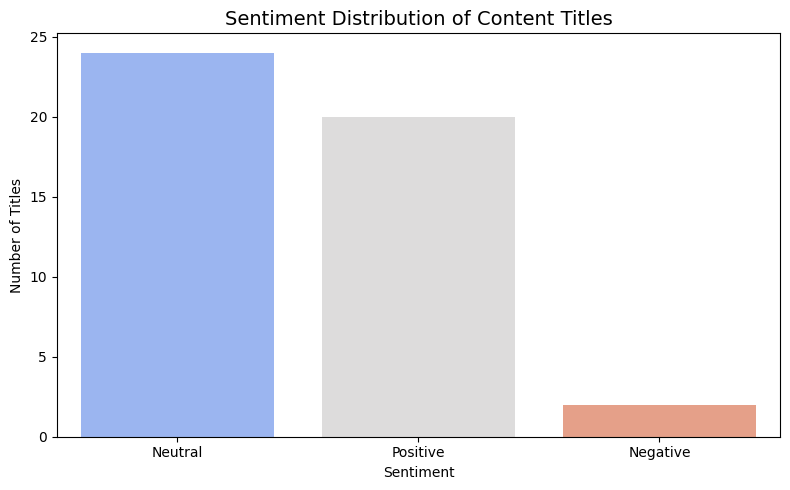

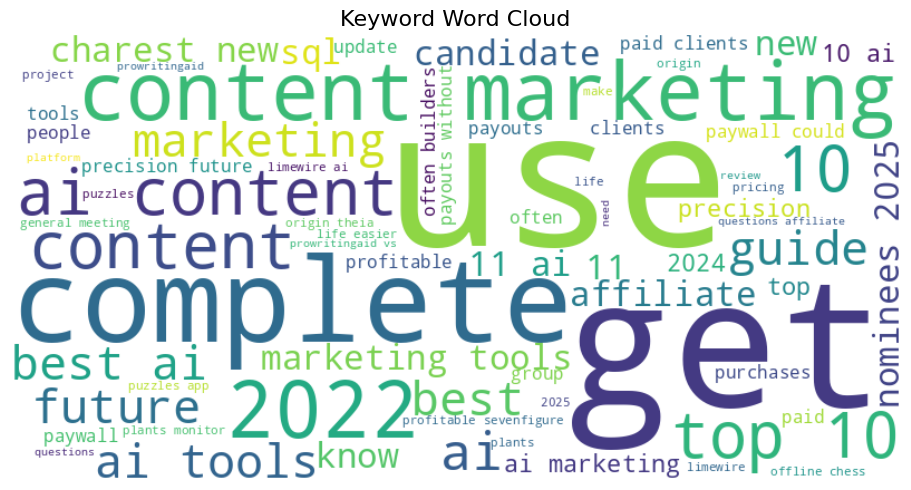

/Users/vinothhaldorai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


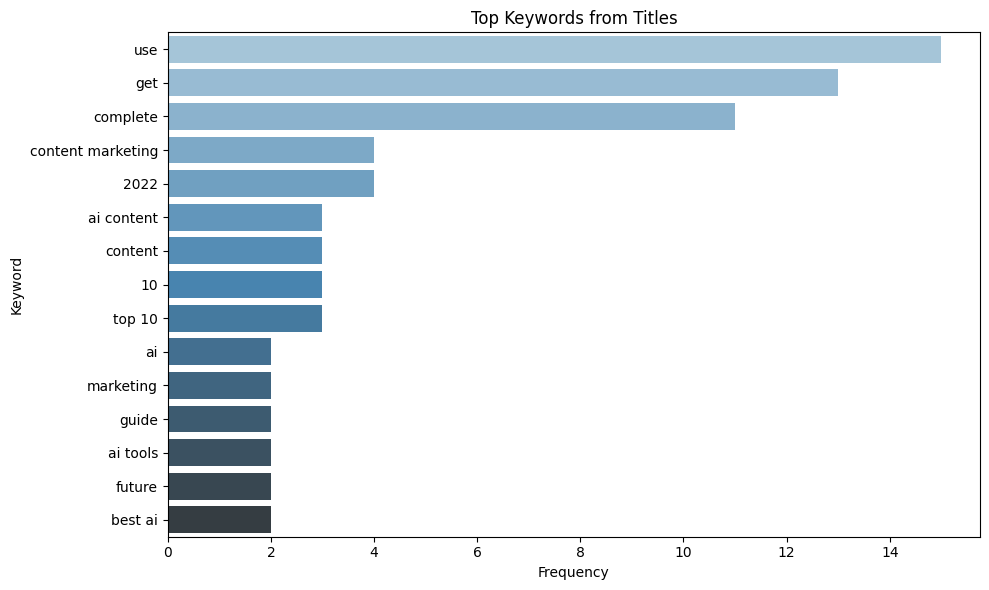

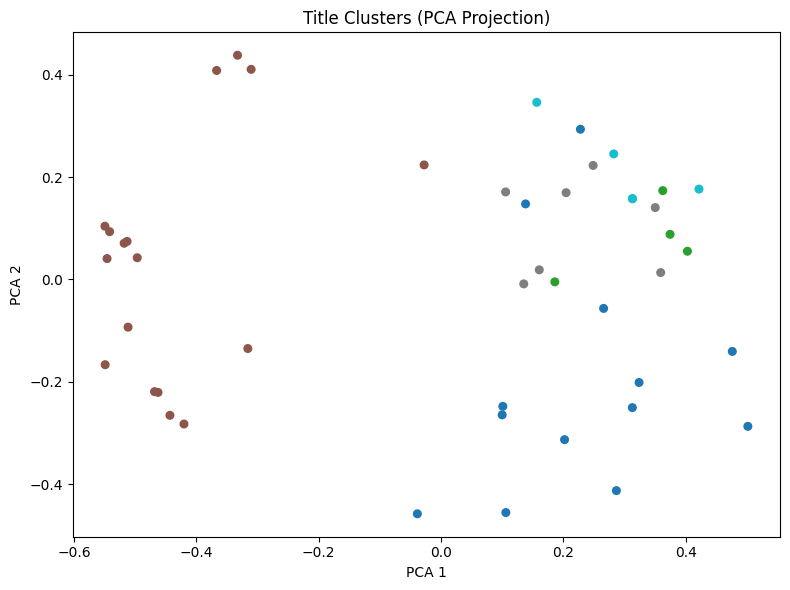

In [6]:
from src.analyzers.trend_sentiment_analyzer import analyze_trends_and_sentiment
from src.analyzers.trend_viz import plot_sentiment_distribution, plot_top_keywords, plot_wordcloud, plot_clusters

result_df, reduced_embeddings = analyze_trends_and_sentiment()

plot_sentiment_distribution(result_df)
plot_wordcloud(result_df)
plot_top_keywords(result_df)
plot_clusters(result_df, reduced_embeddings)
